In [1]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import keras
#  Media su consign e gli altri NaN

2024-02-28 09:27:34.370620: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-28 09:27:34.370655: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-28 09:27:34.385503: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-28 09:27:34.422973: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-28 09:27:35.267650: W tensorflow/compiler/tf2

In [2]:
X = pd.read_csv("Completo/Preprocessato.csv", index_col=0)

In [3]:
df = X
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
arr_scaled = scaler.fit_transform(df) 

In [4]:
y = pd.read_csv("Completo/labels.csv",index_col=0)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
X = arr_scaled

In [10]:
import numpy as np
np.savetxt("dataset_normalizzato.csv", X, delimiter=",")

In [7]:
import tensorflow as tf
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))


In [8]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
model = SVC(kernel='linear')

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

/home/marco/.conda/envs/envTesi/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create the random forest classifier
clf = RandomForestClassifier(n_estimators=100)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


/home/marco/.conda/envs/envTesi/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import keras


model = Sequential([
    Dense(150, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.6),
    Dense(25, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='sigmoid')
])



optimizer = keras.optimizers.Adam(
        learning_rate=0.0008,
        beta_1=0.9,
        beta_2=0.999,
        epsilon=1e-10,
        amsgrad=False,
        weight_decay=0.01,
        clipnorm=None,
        clipvalue=None,
        global_clipnorm=None,
        use_ema=False,
        ema_momentum=0.99,
        ema_overwrite_frequency=None,
        name="adam",
    )



early_stopping = EarlyStopping(monitor='val_recall_m', patience=80)

model.compile(loss='binary_crossentropy', optimizer= optimizer, metrics=['accuracy', f1_m, recall_m, precision_m])

history = model.fit(X_train, y_train, epochs=300, batch_size=500,validation_split=0.2,callbacks=[early_stopping])


2024-02-15 08:56:24.279022: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-15 08:56:24.432939: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-15 08:56:24.433156: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Epoch 1/300


2024-02-15 08:56:25.745997: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-02-15 08:56:27.078178: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f7f44489fc0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-15 08:56:27.078222: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-02-15 08:56:27.087575: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-02-15 08:56:27.116256: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1707983787.198309    2795 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


3/3 [==============================] - 3s 113ms/step - loss: 0.8911 - accuracy: 0.4770 - f1_m: 0.5521 - recall_m: 0.4613 - precision_m: 0.6873 - val_loss: 0.6221 - val_accuracy: 0.6902 - val_f1_m: 0.8167 - val_recall_m: 1.0000 - val_precision_m: 0.6902
Epoch 2/300
3/3 [==============================] - 0s 13ms/step - loss: 0.8473 - accuracy: 0.5084 - f1_m: 0.5777 - recall_m: 0.4887 - precision_m: 0.7064 - val_loss: 0.6230 - val_accuracy: 0.8405 - val_f1_m: 0.8964 - val_recall_m: 1.0000 - val_precision_m: 0.8123
Epoch 3/300
3/3 [==============================] - 0s 13ms/step - loss: 0.8288 - accuracy: 0.4800 - f1_m: 0.5612 - recall_m: 0.4794 - precision_m: 0.6768 - val_loss: 0.5947 - val_accuracy: 0.8221 - val_f1_m: 0.8807 - val_recall_m: 0.9511 - val_precision_m: 0.8199
Epoch 4/300
3/3 [==============================] - 0s 13ms/step - loss: 0.8040 - accuracy: 0.5215 - f1_m: 0.5866 - recall_m: 0.4962 - precision_m: 0.7172 - val_loss: 0.5741 - val_accuracy: 0.6933 - val_f1_m: 0.8182 - va

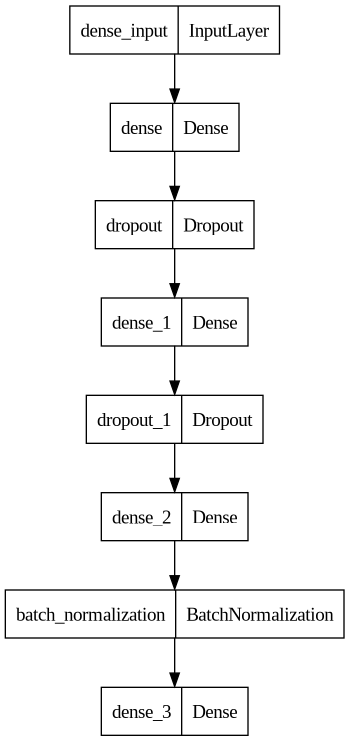

In [11]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_architecture.png')

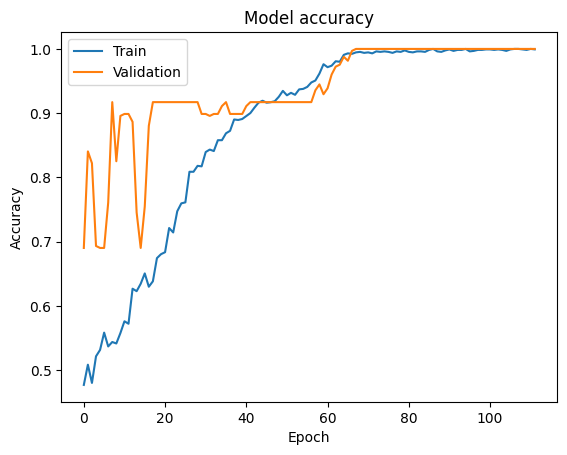

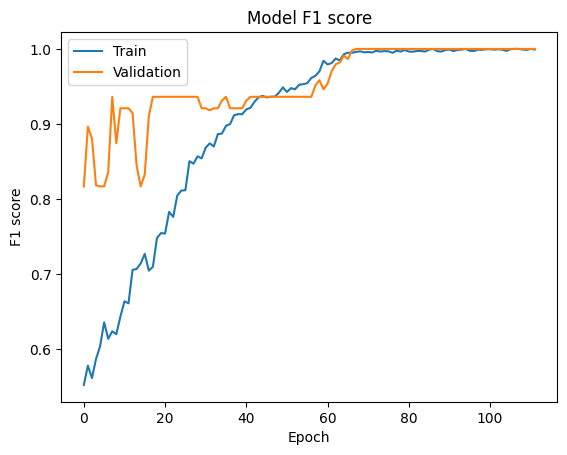

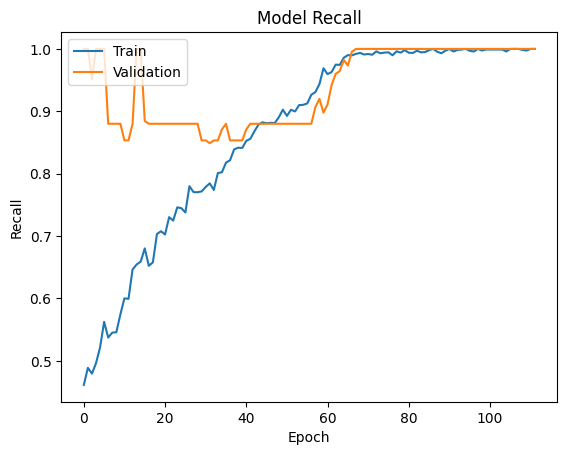

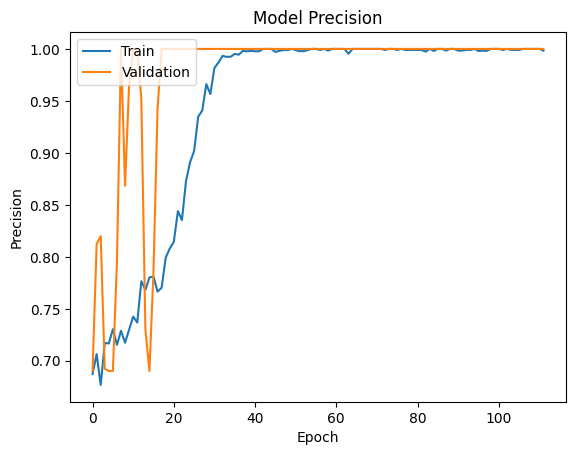

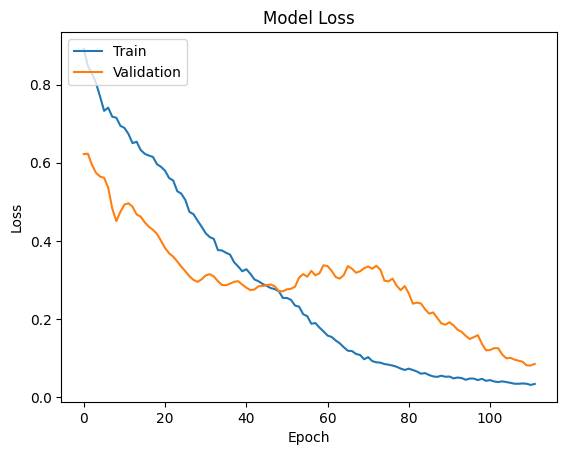

In [12]:
results = history
import matplotlib.pyplot as plt
# Plot training & validation accuracy
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation F1 score
plt.plot(results.history['f1_m'])
plt.plot(results.history['val_f1_m'])
plt.title('Model F1 score')
plt.ylabel('F1 score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation recall
plt.plot(results.history['recall_m'])
plt.plot(results.history['val_recall_m'])
plt.title('Model Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation precision
plt.plot(results.history['precision_m'])
plt.plot(results.history['val_precision_m'])
plt.title('Model Precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [13]:
model.evaluate(X_test, y_test)

22/22 [==============================] - 0s 1ms/step - loss: 0.0875 - accuracy: 0.9971 - f1_m: 0.9980 - recall_m: 1.0000 - precision_m: 0.9960


[0.08749580383300781,
 0.9971346855163574,
 0.9979797601699829,
 1.0,
 0.9960474371910095]

In [14]:
model.predict(X_test)

22/22 [==============================] - 0s 785us/step


array([[0.8571421 ],
       [0.03089782],
       [0.8685459 ],
       [0.07120912],
       [0.8803248 ],
       [0.0324413 ],
       [0.8800834 ],
       [0.84417176],
       [0.05120251],
       [0.04672407],
       [0.88101584],
       [0.9186674 ],
       [0.86062986],
       [0.9148937 ],
       [0.91169846],
       [0.91382086],
       [0.89582413],
       [0.03108249],
       [0.05404085],
       [0.90693045],
       [0.9048063 ],
       [0.06450664],
       [0.06408466],
       [0.93118477],
       [0.8790215 ],
       [0.8729335 ],
       [0.93029845],
       [0.9120321 ],
       [0.95225537],
       [0.04831913],
       [0.03737971],
       [0.87011194],
       [0.87764776],
       [0.908928  ],
       [0.89902395],
       [0.08842701],
       [0.8658378 ],
       [0.9189384 ],
       [0.9226864 ],
       [0.91646004],
       [0.06670453],
       [0.90936774],
       [0.8863004 ],
       [0.9029345 ],
       [0.9176976 ],
       [0.9452563 ],
       [0.9054788 ],
       [0.906

In [12]:
X= arr_scaled
from sklearn.decomposition import PCA

pca = PCA(n_components=1)

pca_transformed_data = pca.fit_transform(df)

In [13]:
np.savetxt("dataset_normalizzato_con_PCA.csv", pca_transformed_data, delimiter=",")

In [16]:
X_train, X_test, y_train, y_test = train_test_split(pca_transformed_data, y, test_size=0.3, random_state=42)

In [17]:
X_train.shape[1]

1

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import keras


model = Sequential([
    Dense(200, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.7),
    Dense(25, activation='relu'),
    Dropout(0.4),
    Dense(10, activation='relu'),
    BatchNormalization(),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])



optimizer = keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    amsgrad=False,
    weight_decay=0.01,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    name="adam",
)



early_stopping = EarlyStopping(monitor='loss', patience=50)

model.compile(loss='binary_crossentropy', optimizer= optimizer, metrics=['accuracy', f1_m, recall_m, precision_m])

history = model.fit(X_train, y_train, epochs=200, batch_size=500,validation_split=0.2,callbacks=[early_stopping])


Epoch 1/200
3/3 [==============================] - 2s 100ms/step - loss: 0.7175 - accuracy: 0.5707 - f1_m: 0.6360 - recall_m: 0.5445 - precision_m: 0.7655 - val_loss: 1.4459 - val_accuracy: 0.3405 - val_f1_m: 0.0851 - val_recall_m: 0.0444 - val_precision_m: 1.0000
Epoch 2/200
3/3 [==============================] - 0s 11ms/step - loss: 0.6336 - accuracy: 0.6866 - f1_m: 0.7497 - recall_m: 0.6677 - precision_m: 0.8551 - val_loss: 1.0268 - val_accuracy: 0.7791 - val_f1_m: 0.8095 - val_recall_m: 0.6800 - val_precision_m: 1.0000
Epoch 3/200
3/3 [==============================] - 0s 11ms/step - loss: 0.5976 - accuracy: 0.7581 - f1_m: 0.8079 - recall_m: 0.7272 - precision_m: 0.9089 - val_loss: 0.8344 - val_accuracy: 0.7791 - val_f1_m: 0.8095 - val_recall_m: 0.6800 - val_precision_m: 1.0000
Epoch 4/200
3/3 [==============================] - 0s 12ms/step - loss: 0.5493 - accuracy: 0.8065 - f1_m: 0.8478 - recall_m: 0.7833 - precision_m: 0.9239 - val_loss: 0.7912 - val_accuracy: 0.7791 - val_f1_m:

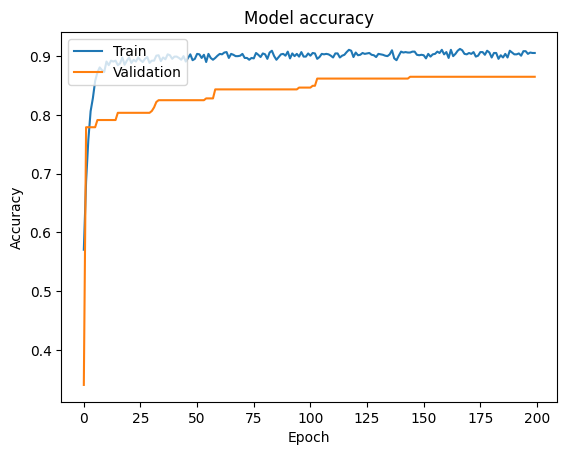

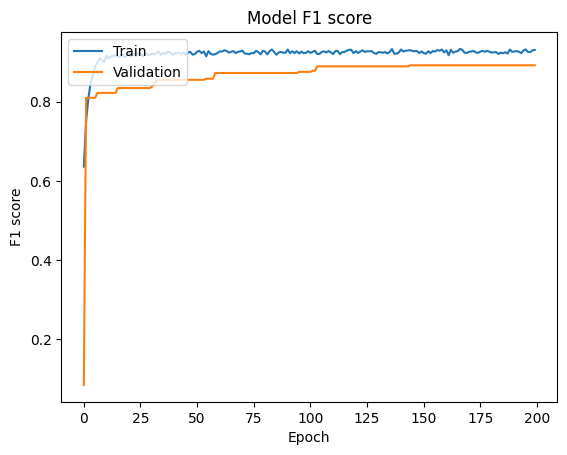

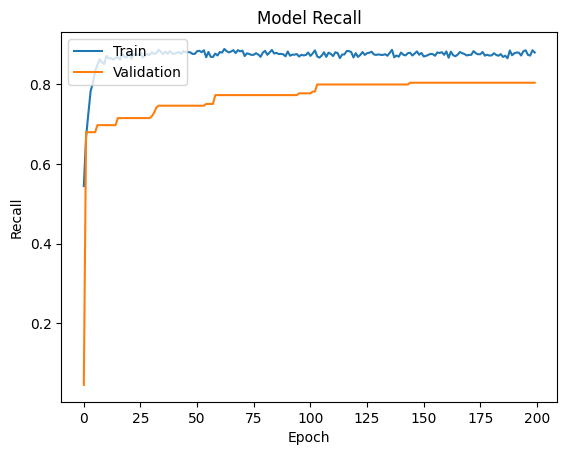

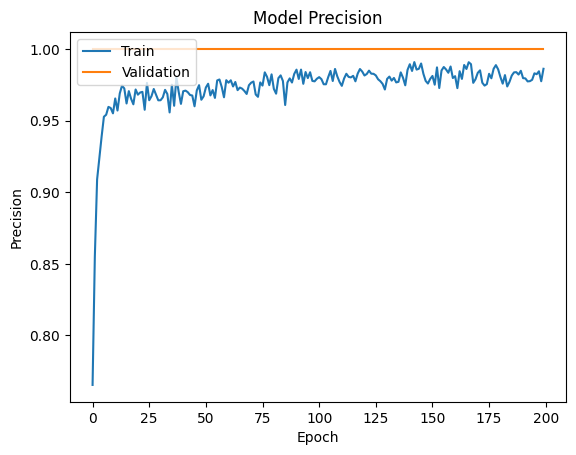

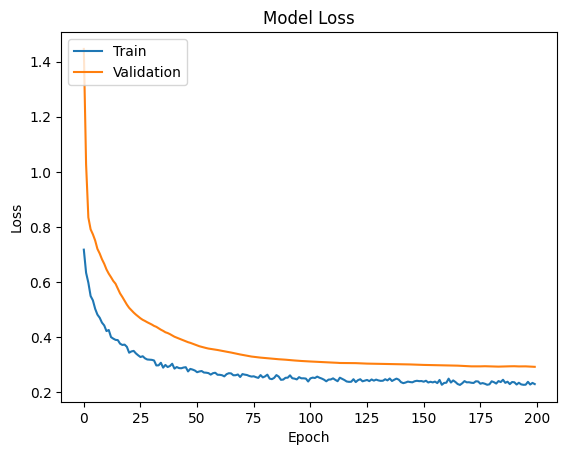

In [19]:
results = history
import matplotlib.pyplot as plt
# Plot training & validation accuracy
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation F1 score
plt.plot(results.history['f1_m'])
plt.plot(results.history['val_f1_m'])
plt.title('Model F1 score')
plt.ylabel('F1 score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation recall
plt.plot(results.history['recall_m'])
plt.plot(results.history['val_recall_m'])
plt.title('Model Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation precision
plt.plot(results.history['precision_m'])
plt.plot(results.history['val_precision_m'])
plt.title('Model Precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [20]:
model.evaluate(X_test, y_test)

22/22 [==============================] - 0s 1ms/step - loss: 0.2261 - accuracy: 0.9126 - f1_m: 0.9318 - recall_m: 0.8745 - precision_m: 1.0000


[0.22609028220176697,
 0.9126074314117432,
 0.9318235516548157,
 0.8744804859161377,
 1.0]

In [21]:
model.predict(X_test)

22/22 [==============================] - 0s 733us/step


array([[0.99815124],
       [0.26365134],
       [0.99787045],
       [0.26480892],
       [0.99740195],
       [0.26413792],
       [0.997981  ],
       [0.9984169 ],
       [0.26459488],
       [0.26449326],
       [0.5842224 ],
       [0.5260256 ],
       [0.99840206],
       [0.9974704 ],
       [0.9974704 ],
       [0.9967996 ],
       [0.9980825 ],
       [0.2642371 ],
       [0.26465306],
       [0.9979431 ],
       [0.9977982 ],
       [0.2649095 ],
       [0.26485857],
       [0.99727017],
       [0.99813   ],
       [0.99684024],
       [0.9972005 ],
       [0.9168411 ],
       [0.26362833],
       [0.26454282],
       [0.26434267],
       [0.99684083],
       [0.99813014],
       [0.9977665 ],
       [0.9906064 ],
       [0.2651143 ],
       [0.9984085 ],
       [0.99722147],
       [0.9974368 ],
       [0.99757355],
       [0.26490933],
       [0.9977003 ],
       [0.9708374 ],
       [0.9980661 ],
       [0.99763584],
       [0.26362836],
       [0.26362893],
       [0.349